In [5]:
from pandas import *
from sklearn import *
from matplotlib.pyplot import *
import seaborn as sns


# from ggplot import *
#rcParams['figure.figsize']=20,20
ob = read_excel("./bazy_danych/01A Obserwacje_nowe.xlsx")
po = read_excel("./bazy_danych/01B Po osobach - nowe.xlsx")



ob[['R_nastroj', 'R_zmeczenie', 'D_nastroj', 'D_zmęczenie']].describe()

ob_eks=ob[['Galeria','D_woła', 'D_pyta', 'D_patrzy', 'patrzy_ktos', 'D_dotyka',
       'R_dotyka', 'D_używa', 'R_używa', 'czas_min_sec', 'time_s']]
ob_eks.groupby(by='Galeria').mean().dropna()

ob_czydalej=ob[['Czy dalej', 'D_czyta', 'R_czyta','R_tlumaczy', 'animator2', 'R_wola_D']]
ob_czydalej['Czy dalej']/=2
ob_czydalej.mean().dropna()




/home/mazurek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Czy dalej     0.993482
D_czyta       0.075461
R_czyta       0.135830
R_tlumaczy    0.046022
animator2     0.029812
R_wola_D      0.026826
dtype: float64

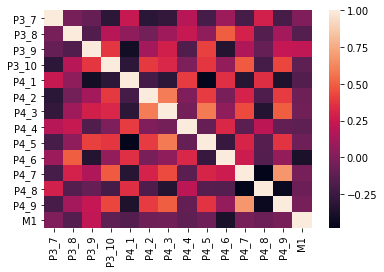

In [6]:
import seaborn as sns
#korelacja zawierająca atrybuty opisujące emocje i zachowanie dziecka podczas wystawy
sns.heatmap(po[['P3_7','P3_8','P3_9', 'P3_10', 'P4_1', 'P4_2', 'P4_3', 'P4_4', 'P4_5', 'P4_6', 'P4_7', 'P4_8', 'P4_9', 'M1']].corr())

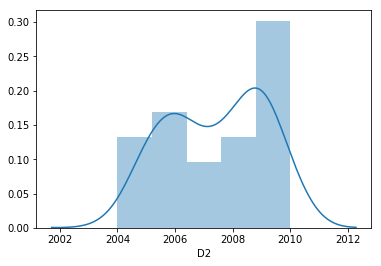

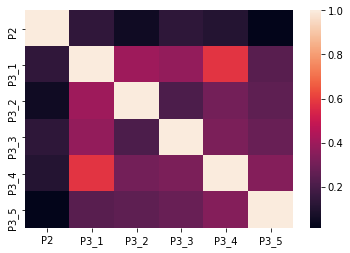

In [5]:




# korelacja odnośnie tego jak zainteresowani dzieci  i opiekunowie
sns.heatmap(po[['P2','P3_1','P3_2', 'P3_3', 'P3_4' , 'P3_5']].corr())


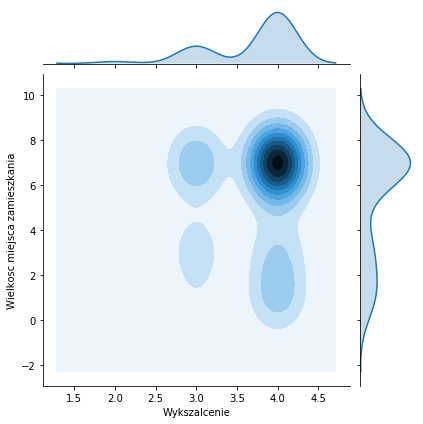

In [14]:

a=sns.jointplot(po['M4a'] , po['M4'], kind='kde', shade=True )
a.set_axis_labels('Wykszalcenie', 'Wielkosc miejsca zamieszkania', fontsize=10)

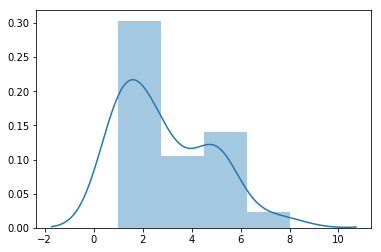

In [6]:
po_edu=po[po['M4a'] == 4]
#wyres przedstawiajacy w jakich dziedzinach opiekunowie są wyksztalceni 
sns.distplot(po_edu[['M4b']].dropna())

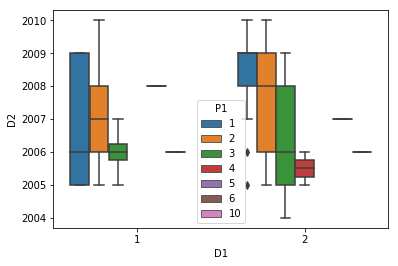

In [18]:


#x- 1 dziewczynka, 2-chłopiec, y-rok urodzenia, P1- ile razy byli już w CNK
sns.boxplot(x="D1", y="D2", hue="P1", data=po)


In [24]:
#sns.violinplot(x="M4", y="M2", hue="D1", data=po, split=True)

feelings=po[['P4_1', 'P4_2', 'P4_3', 'P4_4', 'P4_5', 'P4_6', 'P4_7', 'P4_8', 'P4_9']].mean()

feelings.rename(index={'P4_1':'Radosc', 'P4_2':'Smutek', 'P4_3':'Zlosc', 'P4_4':'Zaciekawienie', 'P4_5':'Znudzenie', 'P4_6':'Żwawosc', 'P4_7':'Nadpobudliwośc', 'P4_8':'Zrelaksowanie', 'P4_9':'Zdenerwowanie'}, inplace=True)

feelings=DataFrame(feelings)
feelings.columns=['srednia']
feelings


,srednia
Radosc,4.362319
Smutek,2.434783
Zlosc,2.695652
Zaciekawienie,4.376812
Znudzenie,2.623188
Żwawosc,4.144928
Nadpobudliwośc,2.507246
Zrelaksowanie,3.304348
Zdenerwowanie,2.333333
